In [1]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
!pip install gdown

In [3]:
# Downloading the data from the gdrive folder
import gdown

file_id = "1KKPx9hp9wBTpjal0Ejg0s0L3Ysslym6Q"
output_file = "clean_data_file.zip"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)

# unzip the data file
!unzip clean_data_file.zip

Downloading...
From (original): https://drive.google.com/uc?id=1KKPx9hp9wBTpjal0Ejg0s0L3Ysslym6Q
From (redirected): https://drive.google.com/uc?id=1KKPx9hp9wBTpjal0Ejg0s0L3Ysslym6Q&confirm=t&uuid=3d03c273-a09e-4a3b-bba6-d27c6cf47d4a
To: /kaggle/working/clean_data_file.zip
100%|██████████| 236M/236M [00:05<00:00, 43.8MB/s]


Archive:  clean_data_file.zip
  inflating: 100k_pos_tr_spec_R100.csv  


In [4]:
# Reading the Data from the csv file containing the spectra and the parameters
file_path = '100k_pos_tr_spec_R100.csv'
data = np.genfromtxt(file_path, delimiter=',',skip_header=1)

In [5]:
# List of the parameters
param_list = ['R_s', 'R_p', 'g_p', 'Temp', 'log_kappa_cloud', 'log_P_cloud','log_H2O','log_CO2','log_CO','log_CH4','log_NH3']

df1 = pd.DataFrame(data[0:,:269])
df2 = pd.DataFrame(data[0:,269:], columns=param_list)
df3 = pd.concat([df1, df2], axis=1)
df3

0         1         2         3         4         5         6  \
0      0.004014  0.004014  0.004014  0.004014  0.004014  0.004014  0.004014   
1      0.000107  0.000107  0.000107  0.000107  0.000107  0.000107  0.000107   
2      0.000358  0.000358  0.000358  0.000358  0.000357  0.000357  0.000357   
3      0.012516  0.012516  0.012516  0.012516  0.012516  0.012516  0.012515   
4      0.001427  0.001427  0.001427  0.001427  0.001427  0.001427  0.001427   
...         ...       ...       ...       ...       ...       ...       ...   
98659  0.051244  0.051231  0.051218  0.051204  0.051189  0.051176  0.051165   
98660  0.013549  0.013549  0.013549  0.013549  0.013549  0.013549  0.013549   
98661  0.028945  0.028936  0.028931  0.028919  0.028914  0.028910  0.028905   
98662  0.004606  0.004605  0.004604  0.004602  0.004601  0.004600  0.004599   
98663  0.004156  0.004154  0.004152  0.004151  0.004149  0.004147  0.004145   

              7         8         9  ...       R_p        g_p         Temp  \
0      0.004014  0.004014  0.004014  ...  1.658348  17.176982  3327.875478   
1      0.000107  0.000107  0.000107  ...  0.258443  16.036432  2034.071133   
2      0.000357  0.000357  0.000357  ...  0.503774   9.066010  1712.661454   
3      0.012515  0.012515  0.012515  ...  0.562965   7.254639  3287.260930   
4      0.001427  0.001427  0.001427  ...  0.745250  35.230361  2895.010899   
...         ...       ...       ...  ...       ...        ...          ...   
98659  0.051157  0.051161  0.051157  ...  1.127280  23.840443  1888.494072   
98660  0.013549  0.013549  0.013549  ...  0.821014  39.964869   608.918946   
98661  0.028909  0.028904  0.028898  ...  1.585554  21.984786  1662.144409   
98662  0.004598  0.004596  0.004595  ...  1.523560  21.601466  2205.683764   
98663  0.004143  0.004141  0.004140  ...  1.077294  24.499179  2910.737519   

       log_kappa_cloud  log_P_cloud   log_H2O   log_CO2    log_CO   log_CH4  \
0            -3.855474    -3.844470 -8.889865 -4.018888 -3.195541 -7.868857   
1            -3.014919    -2.962217 -3.225697 -2.038615 -5.329029 -3.169883   
2            -2.246068    -1.677456 -3.993484 -2.895214 -7.397882 -8.908273   
3            -1.086659    -3.761693 -8.448541 -3.301345 -4.516020 -7.289866   
4            -1.323324    -1.794849 -8.350682 -4.666140 -6.680365 -6.197769   
...                ...          ...       ...       ...       ...       ...   
98659        -0.852804     0.174308 -8.328901 -4.306115 -5.311498 -4.732160   
98660        -0.080777    -2.934876 -2.272423 -5.898074 -4.111940 -6.111954   
98661        -5.621292    -0.207594 -2.164336 -5.986446 -4.369003 -3.304317   
98662        -2.764175     0.358894 -3.131075 -5.491361 -3.416492 -4.298408   
98663        -0.507385    -0.037324 -7.791192 -5.452748 -2.585713 -6.886589   

        log_NH3  
0     -5.895533  
1     -3.206833  
2     -7.172669  
3     -7.753208  
4     -5.475105  
...         ...  
98659 -2.606973  
98660 -5.232814  
98661 -8.281498  
98662 -5.343337  
98663 -6.974510  

[98664 rows x 280 columns]

In [6]:
train_data = data
new_spec = np.zeros_like(train_data[:,:269])
for i in range(len(train_data)):
    mean_sp = np.mean(train_data[i,:269])
    std_sp = np.std(train_data[i,:269])
    new_spec[i,:269] = (train_data[i,:269] - mean_sp) / std_sp

## After PCA

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


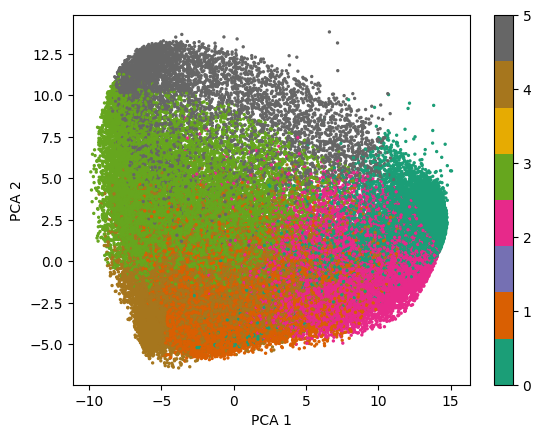

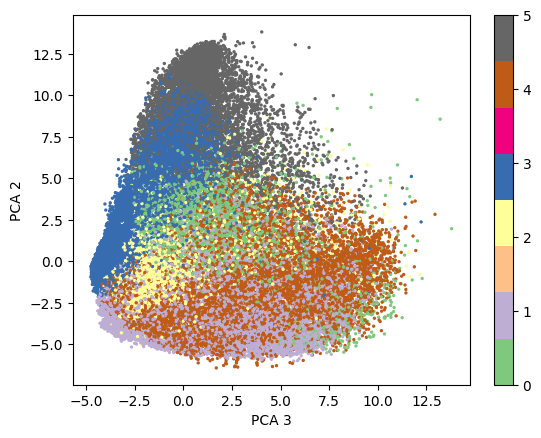

In [8]:


X = new_spec

pca = PCA(n_components=20)
PCA_out = pca.fit_transform(X)

scaler = StandardScaler()
PCA_scaled = scaler.fit_transform(PCA_out)

kmeans = KMeans(n_clusters=6)
kmeans.fit(PCA_scaled)
cluster_labels = kmeans.labels_

plt.figure()
plt.scatter(PCA_out[:,0],PCA_out[:,1],c=cluster_labels,cmap='Dark2',s=2)
plt.colorbar()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.figure()
plt.scatter(PCA_out[:,2],PCA_out[:,1],c=cluster_labels,cmap='Accent',s=2)
plt.colorbar()
plt.xlabel('PCA 3')
plt.ylabel('PCA 2')

plt.show()

## tSNE

In [12]:


X = new_spec[:] # Features

pca = PCA(n_components=20)
PCA_out = pca.fit_transform(X)

scaler = StandardScaler()
PCA_scaled = scaler.fit_transform(PCA_out)

In [13]:
import time
from sklearn.manifold import TSNE

time_start = time.time()
Xtsne = TSNE(n_components=2).fit_transform(PCA_scaled)

print('t-SNE done! Time taken: {} seconds'.format(time.time()-time_start))

t-SNE done! Time taken: 1084.7538123130798 seconds


In [14]:
Xtsne.shape

(98664, 2)

In [15]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(Xtsne)
cluster_labels = kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


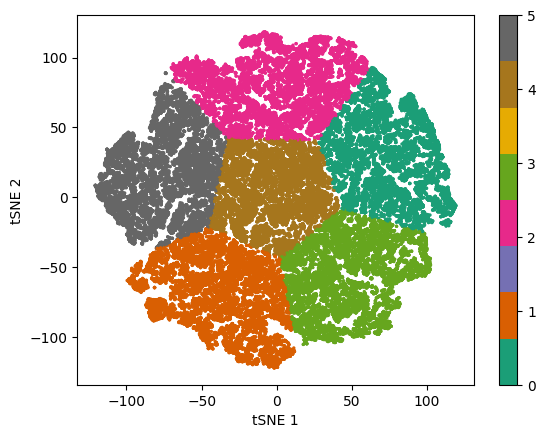

In [16]:
plt.figure()
plt.scatter(Xtsne[:,0],Xtsne[:,1],c=cluster_labels,cmap='Dark2',s=2)
plt.colorbar()
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.show()

In [17]:
np.unique(cluster_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32),
 array([15984, 17355, 17266, 16387, 15092, 16580]))

In [18]:
cl_par_df = df3.iloc[:,274:]
cl_par_df['cluster'] = cluster_labels
cl_par_df

log_P_cloud   log_H2O   log_CO2    log_CO   log_CH4   log_NH3  cluster
0        -3.844470 -8.889865 -4.018888 -3.195541 -7.868857 -5.895533        5
1        -2.962217 -3.225697 -2.038615 -5.329029 -3.169883 -3.206833        5
2        -1.677456 -3.993484 -2.895214 -7.397882 -8.908273 -7.172669        5
3        -3.761693 -8.448541 -3.301345 -4.516020 -7.289866 -7.753208        5
4        -1.794849 -8.350682 -4.666140 -6.680365 -6.197769 -5.475105        5
...            ...       ...       ...       ...       ...       ...      ...
98659     0.174308 -8.328901 -4.306115 -5.311498 -4.732160 -2.606973        1
98660    -2.934876 -2.272423 -5.898074 -4.111940 -6.111954 -5.232814        3
98661    -0.207594 -2.164336 -5.986446 -4.369003 -3.304317 -8.281498        2
98662     0.358894 -3.131075 -5.491361 -3.416492 -4.298408 -5.343337        5
98663    -0.037324 -7.791192 -5.452748 -2.585713 -6.886589 -6.974510        4

[98664 rows x 7 columns]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

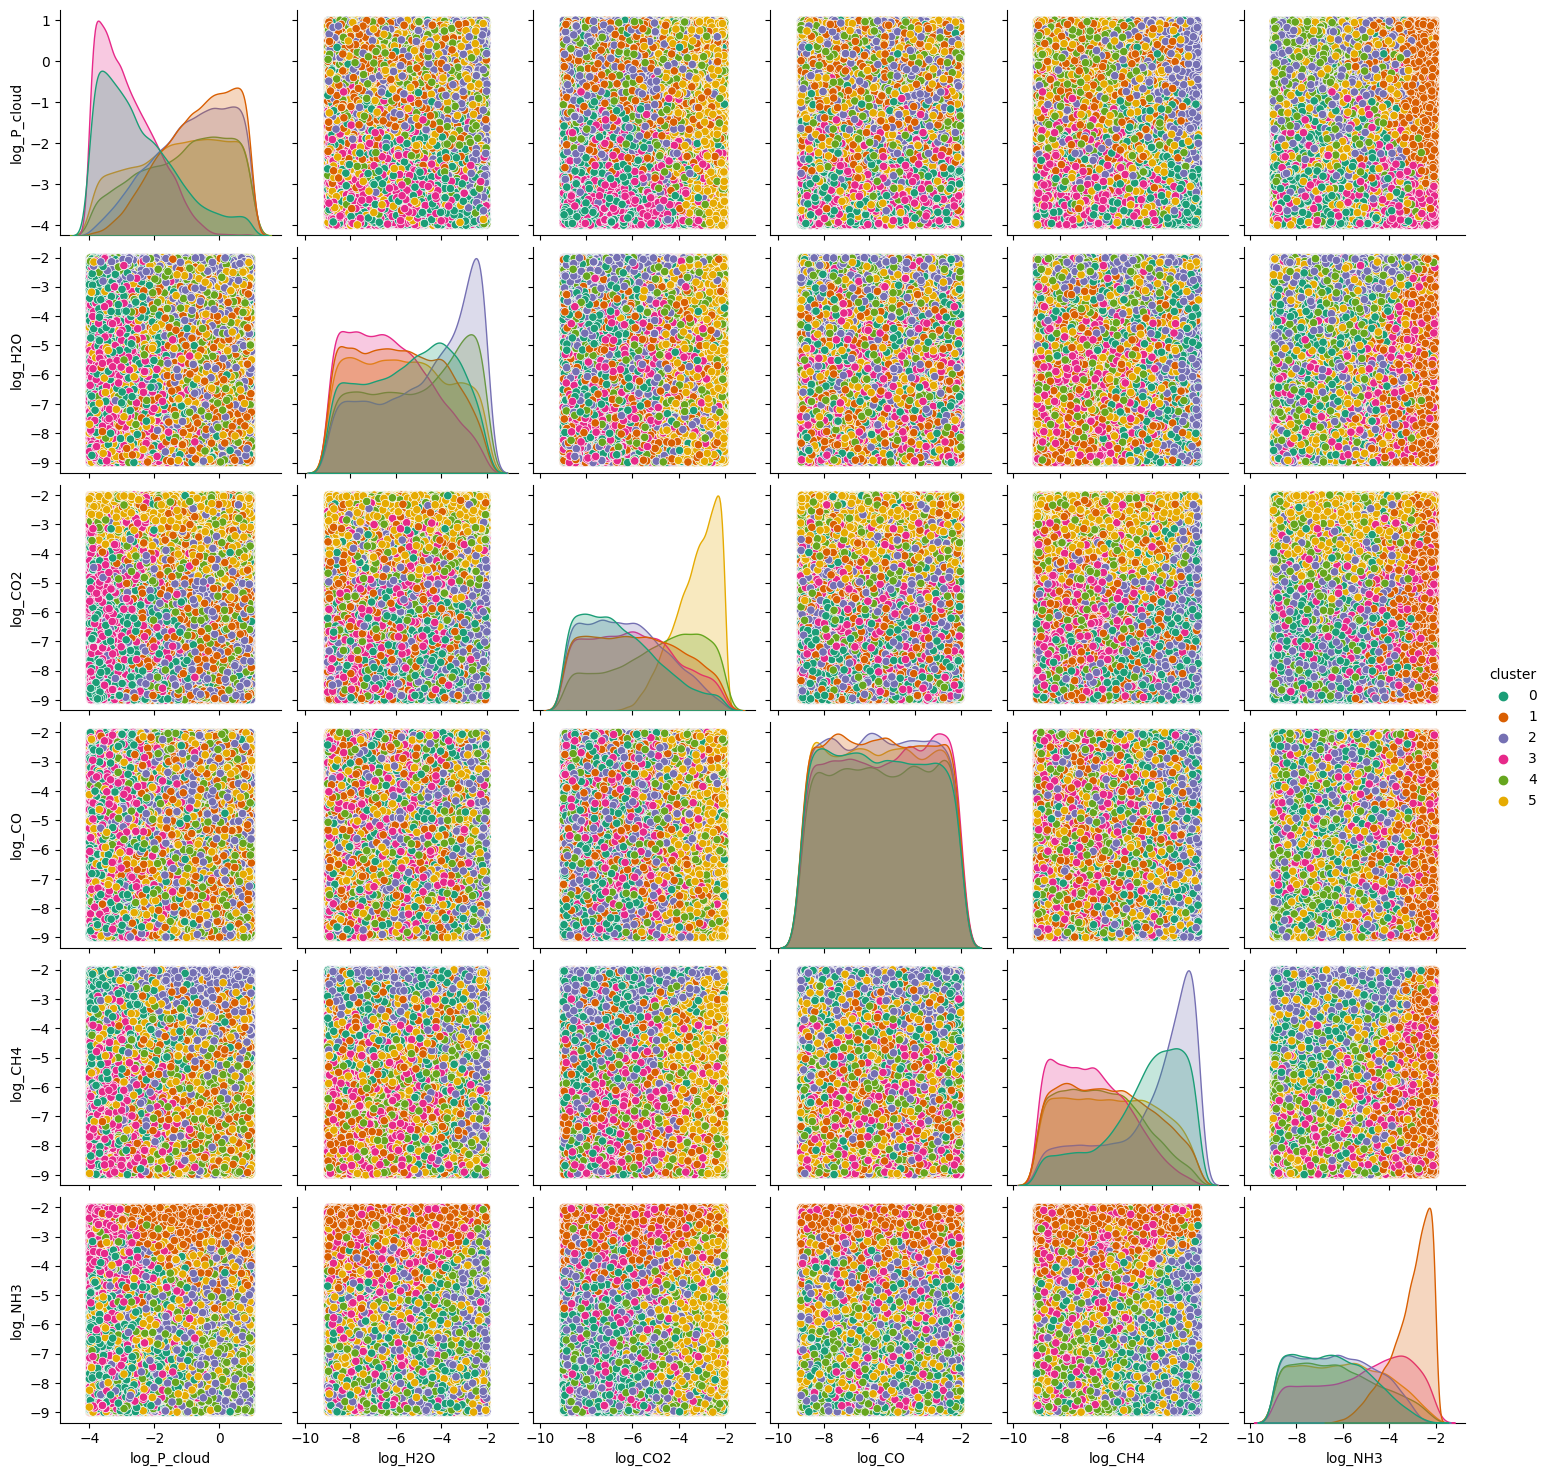

In [19]:
# pair plot for the clusters
import seaborn as sns
sns.pairplot(cl_par_df, hue='cluster', palette='Dark2', diag_kind='kde')

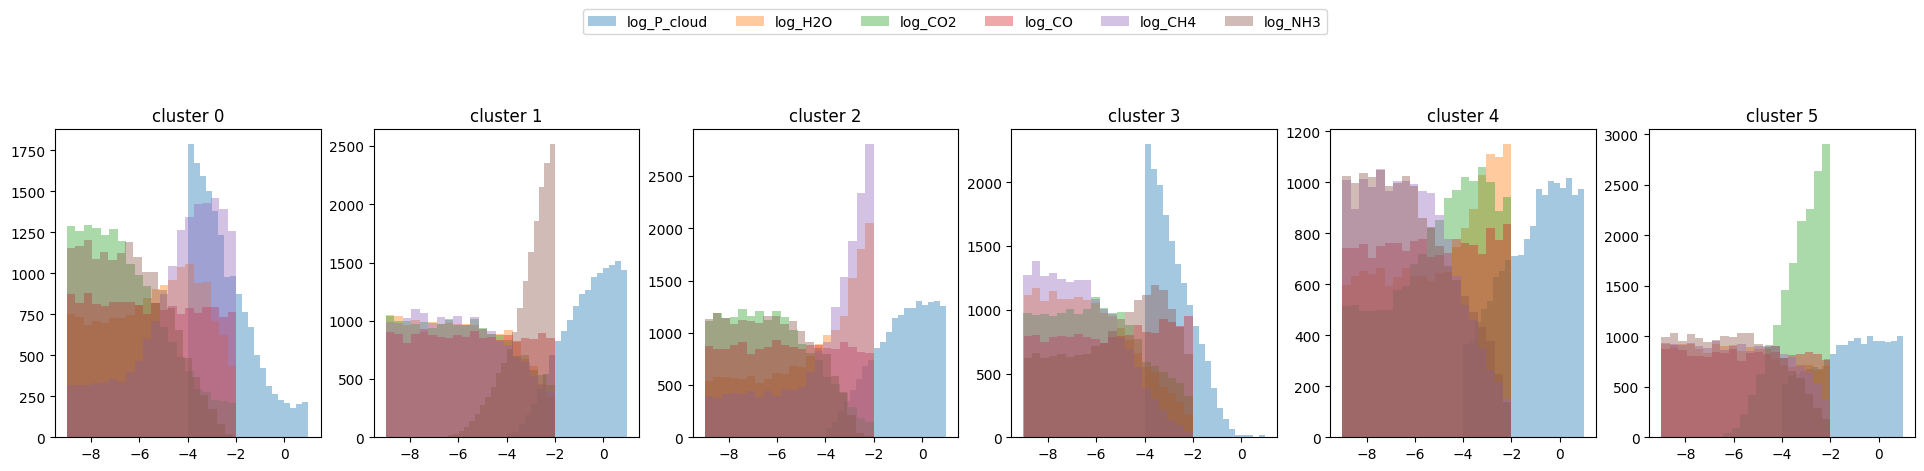

In [20]:
cl_key = ['log_P_cloud', 'log_H2O', 'log_CO2', 'log_CO', 'log_CH4', 'log_NH3']

fig, axs = plt.subplots(1, 6, figsize=(24, 4))
for i in range(6):
    for j in range(6):
      if i == 0:
        axs[i].hist(cl_par_df[cl_par_df['cluster'] == i][cl_key[j]], bins=20,alpha=0.4,label=cl_key[j])
      else:
        axs[i].hist(cl_par_df[cl_par_df['cluster'] == i][cl_key[j]], bins=20,alpha=0.4)
      axs[i].set_title('cluster '+str(i))

fig.legend(loc='lower center', bbox_to_anchor=(0.5, 1.1), ncol=6)
plt.show()